<a href="https://colab.research.google.com/github/jodysuseno/PraktikumML_073-076/blob/main/tugas/Tugas_3_Klasifikasi_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --no-check-certificate \
    https://github.com/jodysuseno/PraktikumML_073-076/blob/main/CornLeafSplited.zip?raw=true \
    -O /content/CornLeafSplited.zip

--2021-11-02 09:26:14--  https://github.com/jodysuseno/PraktikumML_073-076/blob/main/CornLeafSplited.zip?raw=true
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/jodysuseno/PraktikumML_073-076/raw/main/CornLeafSplited.zip [following]
--2021-11-02 09:26:15--  https://github.com/jodysuseno/PraktikumML_073-076/raw/main/CornLeafSplited.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/jodysuseno/PraktikumML_073-076/main/CornLeafSplited.zip [following]
--2021-11-02 09:26:15--  https://raw.githubusercontent.com/jodysuseno/PraktikumML_073-076/main/CornLeafSplited.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.co

In [2]:
import tensorflow as tf
from tensorflow import keras

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
import os
import zipfile

local_zip = '/content/CornLeafSplited.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import os
path = 'CornLeafSplited/train/Corn_Cercospora/'
files = os.listdir(path)

for index, file in enumerate(files):
    os.rename(path+file, path +'Corn_Cercospora' + str(index)+ '.jpg')

path = '/content/CornLeafSplited/train/Corn_Common_rust/'
files = os.listdir(path)

for index, file in enumerate(files):
    os.rename(path+file, path +'Corn_Common_rust' + str(index)+ '.jpg')

path = '/content/CornLeafSplited/train/Corn_Northern_Leaf_Blight/'
files = os.listdir(path)

for index, file in enumerate(files):
    os.rename(path+file, path +'Corn_Northern_Leaf_Blight' + str(index)+ '.jpg')

path = '/content/CornLeafSplited/train/Corn_healthy/'
files = os.listdir(path)

for index, file in enumerate(files):
    os.rename(path+file, path +'Corn_healthy' + str(index)+ '.jpg')

path = 'CornLeafSplited/valid/Corn_Cercospora/'
files = os.listdir(path)

for index, file in enumerate(files):
    os.rename(path+file, path +'Corn_Cercospora' + str(index)+ '.jpg')

path = '/content/CornLeafSplited/valid/Corn_Common_rust/'
files = os.listdir(path)

for index, file in enumerate(files):
    os.rename(path+file, path +'Corn_Common_rust' + str(index)+ '.jpg')

path = '/content/CornLeafSplited/valid/Corn_Northern_Leaf_Blight/'
files = os.listdir(path)

for index, file in enumerate(files):
    os.rename(path+file, path +'Corn_Northern_Leaf_Blight' + str(index)+ '.jpg')

path = '/content/CornLeafSplited/valid/Corn_healthy/'
files = os.listdir(path)

for index, file in enumerate(files):
    os.rename(path+file, path +'Corn_healthy' + str(index)+ '.jpg')

In [5]:
file_train_Cercos = os.listdir('CornLeafSplited/train/Corn_Cercospora/')
file_Val_Cercos = os.listdir('CornLeafSplited/valid/Corn_Cercospora/')

file_train_Common = os.listdir('/content/CornLeafSplited/train/Corn_Common_rust/')
file_Val_Common = os.listdir('/content/CornLeafSplited/valid/Corn_Common_rust/')

file_train_Northern = os.listdir('/content/CornLeafSplited/train/Corn_Northern_Leaf_Blight/')
file_Val_Northern = os.listdir('/content/CornLeafSplited/valid/Corn_Northern_Leaf_Blight/')

file_train_healthy = os.listdir('/content/CornLeafSplited/train/Corn_healthy/')
file_Val_healthy = os.listdir('/content/CornLeafSplited/valid/Corn_healthy/')

#=================================================

print(file_train_Cercos[0:int(len(file_train_Cercos) * .001)])
print("data Cercos train : " + str(len(file_train_Cercos)))
print("data Cercos validation : " + str(len(file_Val_Cercos)))

print("data Common train : " + str(len(file_train_Common)))
print("data Common validation : " + str(len(file_Val_Common)))

print("data Northern train : " + str(len(file_train_Northern)))
print("data Northern validation : " + str(len(file_Val_Northern)))

print("data Healthy train : " + str(len(file_train_healthy)))
print("data Healthy validation : " + str(len(file_Val_healthy)))

[]
data Cercos train : 359
data Cercos validation : 154
data Common train : 834
data Common validation : 358
data Northern train : 689
data Northern validation : 296
data Healthy train : 813
data Healthy validation : 349


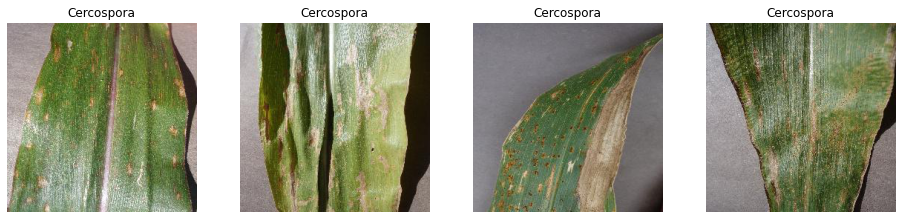

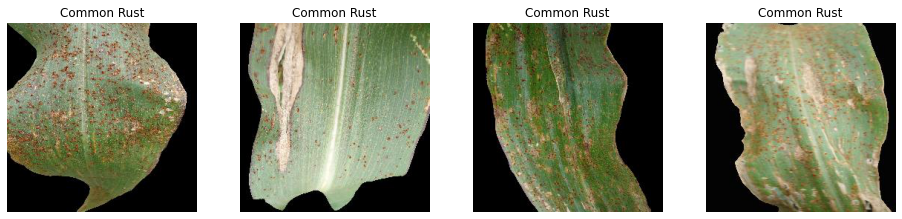

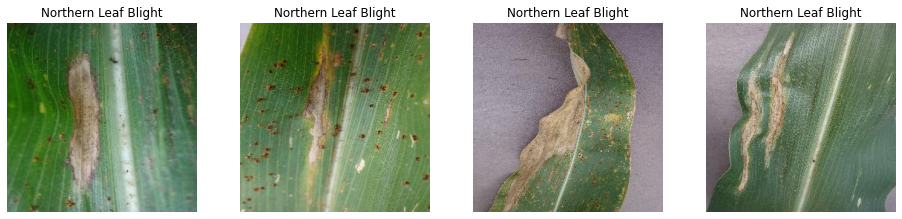

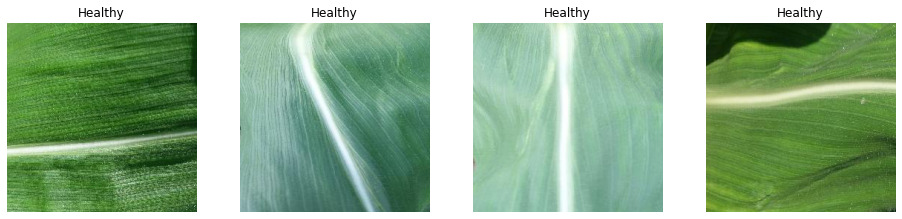

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mping

Cercospora_dir=os.path.join('/content/CornLeafSplited/train/Corn_Cercospora')
Common_dir=os.path.join('/content/CornLeafSplited/train/Corn_Common_rust')
Northern_dir=os.path.join('/content/CornLeafSplited/train/Corn_Northern_Leaf_Blight')
Healthy_dir=os.path.join('/content/CornLeafSplited/train/Corn_healthy')

Cercospora_image = os.listdir(Cercospora_dir)
Common_image = os.listdir(Common_dir)
Northern_image = os.listdir(Northern_dir)
Healthy_image = os.listdir(Healthy_dir)

fname1 = [os.path.join(Cercospora_dir,fname)
        for fname in Cercospora_image[:4]]

fname2 = [os.path.join(Common_dir,fname)
        for fname in Common_image[:4]]

fname3 = [os.path.join(Northern_dir,fname)
        for fname in Northern_image[:4]]

fname4 = [os.path.join(Healthy_dir,fname)
        for fname in Healthy_image[:4]]

ncolu = 4
nrow = 4
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)#
for i,fname in enumerate(fname1):
    sp = plt.subplot(4,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('Cercospora')
    plt.imshow(img)
plt.show()

ncolu = 4
nrow = 4
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)
for i,fname in enumerate(fname2):
    sp = plt.subplot(4,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('Common Rust')
    plt.imshow(img)
    
plt.show()

ncolu = 4
nrow = 4
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)
for i,fname in enumerate(fname3):
    sp = plt.subplot(4,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('Northern Leaf Blight')
    plt.imshow(img)
    
plt.show()

ncolu = 4
nrow = 4
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)
for i,fname in enumerate(fname4):
    sp = plt.subplot(4,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('Healthy')
    plt.imshow(img)
    
plt.show()

In [7]:
import os
import cv2
import numpy as np

# Gather data train
train_data = []
train_label = []

train_dir=os.path.join('/content/CornLeafSplited/train')
for r, d, f in os.walk(train_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

In [8]:
# Gather data validation
val_data = []
val_label = []

vali_dir=os.path.join('/content/CornLeafSplited/valid')
for r, d, f in os.walk(vali_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            val_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            val_label.append(label)

val_data = np.array(val_data)
val_label = np.array(val_label)

In [9]:
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Validation Data = ", val_data.shape)
print("Validation Label = ", val_label.shape)

Train Data =  (2695, 150, 150, 3)
Train Label =  (2695,)
Validation Data =  (1157, 150, 150, 3)
Validation Label =  (1157,)


In [10]:
# Normalisasi dataset
print("Data sebelum di-normalisasi ", train_data[10][0][0])
x_train = train_data.astype('float32') / 255.0
x_val = val_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_train[10][0][0])

Data sebelum di-normalisasi  [209 196 204]
Data setelah di-normalisasi  [0.81960785 0.76862746 0.8       ]


In [11]:
from sklearn.preprocessing import LabelEncoder
print("Label sebelum di-encoder ", train_label[995:1005])

lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_val = lb.fit_transform(val_label)

print("Label setelah di-encoder ", y_train[995:1005])

Label sebelum di-encoder  ['Corn_healthy' 'Corn_healthy' 'Corn_healthy' 'Corn_healthy'
 'Corn_healthy' 'Corn_healthy' 'Corn_healthy' 'Corn_healthy'
 'Corn_healthy' 'Corn_healthy']
Label setelah di-encoder  [3 3 3 3 3 3 3 3 3 3]


DEFINISIKAN MODEL

In [12]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [31]:
# Buat model dengan 1 input layer, 1 hidden layer, dan 1 output layer
img_input = layers.Input(shape=(150, 150, 3)) # layer input
x = layers.Flatten()(img_input)
x = layers.Dense(12, input_dim=8, activation='relu')(x)
x = layers.Dense(8, activation='sigmoid')(x)
output = layers.Dense(1, activation='sigmoid')(x)

#menampilkan summary
model = Model(img_input, output)
model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 67500)             0         
_________________________________________________________________
dense_22 (Dense)             (None, 12)                810012    
_________________________________________________________________
dense_23 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 9         
Total params: 810,125
Trainable params: 810,125
Non-trainable params: 0
_________________________________________________________________


In [32]:
# Compiler model menggunakan Adam optimizer
from tensorflow.keras.optimizers import Adam


model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.00146),
              metrics=['acc'])

In [34]:
H = model.fit(x_train, y_train, batch_size=20, epochs=100, validation_data=(x_val, y_val))

Epoch 1/100
135/135 [==============================] - 1s 8ms/step - loss: -2.5395 - acc: 0.3095 - val_loss: -2.7341 - val_acc: 0.3094
Epoch 2/100
135/135 [==============================] - 1s 9ms/step - loss: -2.9165 - acc: 0.3095 - val_loss: -3.1089 - val_acc: 0.3094
Epoch 3/100
135/135 [==============================] - 1s 9ms/step - loss: -3.2929 - acc: 0.3095 - val_loss: -3.4840 - val_acc: 0.3094
Epoch 4/100
135/135 [==============================] - 1s 9ms/step - loss: -3.6703 - acc: 0.3095 - val_loss: -3.8616 - val_acc: 0.3094
Epoch 5/100
135/135 [==============================] - 1s 9ms/step - loss: -4.0500 - acc: 0.3095 - val_loss: -4.2442 - val_acc: 0.3094
Epoch 6/100
135/135 [==============================] - 1s 8ms/step - loss: -4.4340 - acc: 0.3095 - val_loss: -4.6284 - val_acc: 0.3094
Epoch 7/100
135/135 [==============================] - 1s 8ms/step - loss: -4.8202 - acc: 0.3095 - val_loss: -5.0168 - val_acc: 0.3094
Epoch 8/100
135/135 [==============================] - 

Evaluasi Model

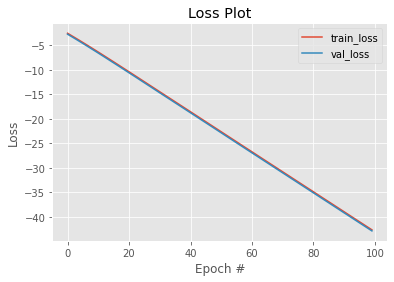

In [35]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

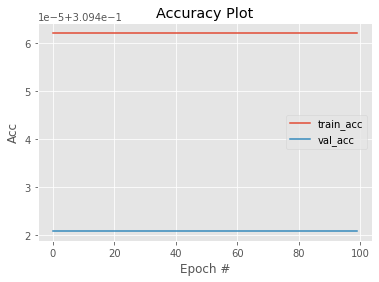

In [36]:

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [37]:
from sklearn.metrics import classification_report

pred = model.predict(x_val)
labels = (pred > 0.5).astype(np.int)

print(classification_report(y_val, labels))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       154
           1       0.31      1.00      0.47       358
           2       0.00      0.00      0.00       296
           3       0.00      0.00      0.00       349

    accuracy                           0.31      1157
   macro avg       0.08      0.25      0.12      1157
weighted avg       0.10      0.31      0.15      1157

